In [1]:
import apss_lib
%matplotlib inline

2020-04-19 23:50:10.217571


In [2]:
import numpy as np

tabtab = "/home/aspiga/data/InSight/HP3_RAD/hp3_rad_der_00014_20181211_060358.tab"
tabtab = "/home/aspiga/data/InSight/HP3_RAD/hp3_rad_der_00016_20181212_042332.tab"
tabtab = "/home/aspiga/data/InSight/HP3_RAD/hp3_rad_der_00016_20181212_052510.tab"

tabtab2 = "/home/aspiga/data/InSight/HP3_RAD/hp3_rad_der_00305_20191006_053040.tab"

names = ["UTC",\
         "sol",\
         "LTST",\
         "Ls",\
         "sun_azimuth",\
         "sun_phase_angle_1",\
         "incidence_angle_1",\
         "sigma_sun_phase_angle_1",\
         "sigma_incidence_angle_1",\
         "shadow_1",\
         "sun_phase_angle_2",\
         "incidence_angle_2",\
         "sigma_sun_phase_angle_2",\
         "sigma_incidence_angle_2",\
         "shadow_2",\
         "TS_1",\
         "TS_2",\
         "dTS_1",\
         "dTS_2"]

data = np.genfromtxt(tabtab,dtype=None,names=names,filling_values=(np.nan))
data2 = np.genfromtxt(tabtab2,dtype=None,names=names,filling_values=(np.nan))

/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  # This is added back by InteractiveShellApp.init_path()
/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if sys.path[0] == '':


REMOVED 29.0 11 11.8681 11.9353 14
REMOVED 30.0 11 11.8647 12.9514 14
REMOVED 46.0 11 12.8847 13.9714 14
REMOVED 62.0 11 12.8864 13.9733 14
REMOVED 77.0 11 12.8867 13.9736 14
REMOVED 80.0 11 11.0014 11.6572 14
REMOVED 81.0 11 13.8858 13.9731 14
REMOVED 85.0 11 11.8969 11.9839 14
REMOVED 96.0 11 12.8097 13.2597 14
REMOVED 100.0 11 11.89 12.9769 14
REMOVED 152.0 11 12.9336 13.9997 14
REMOVED 203.0 11 11.0036 12.0197 14
REMOVED 326.0 11 12.91 13.9969 14
REMOVED 339.0 11 13.9103 13.9975 14
REMOVED 342.0 11 13.91 13.9972 14
REMOVED 343.0 11 11.9125 12.9994 14
REMOVED 368.0 11 11.0019 11.9508 14
REMOVED 375.0 11 11.0019 11.9503 14
REMOVED 384.0 11 11.0036 11.9725 14
REMOVED 385.0 11 12.9108 13.9978 14


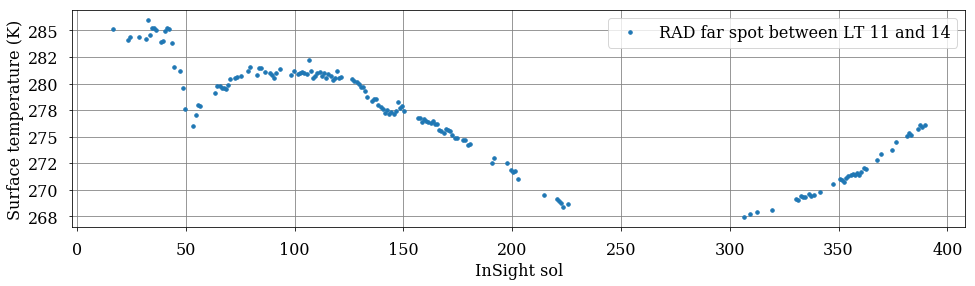

In [3]:
ts,te = 10,15
#ts,te = 0,5
#ts,te = 12,13
#ts,te = 8,17
#ts,te = 11,15
#ts,te = 12,14
#ts,te = 11,13
ts,te = 11,14

ltst = data["LTST"]
idx = (ltst >= ts)*(ltst <= te)
w = np.where(idx)
localt = data["LTST"][w]
#print localt[0:1000]
time = data["sol"][w] + (localt/24.)
field = data["TS_2"][w]

ltst2 = data2["LTST"]
idx = (ltst2 >= ts)*(ltst2 <= te)
w = np.where(idx)
localt2 = data2["LTST"][w]
#print localt[0:1000]
time2 = data2["sol"][w] + (localt2/24.)
field2 = data2["TS_2"][w]

ltst = np.append(ltst,ltst2)
localt = np.append(localt,localt2)
time = np.append(time,time2)
field = np.append(field,field2)

######## BINNING
dcmp,intp = np.modf(time)
sols = np.array([])
vals = np.array([])
for val in np.unique(intp):
    w = np.where(intp == val)
    if (np.min(localt[w])>ts+1) or (np.max(localt[w])<te-1):
        print "REMOVED", val, ts,np.min(localt[w]),np.max(localt[w]),te
    else:
        selec = field[w]
        vals = np.append(vals,np.mean(selec))
        sols = np.append(sols,val+(te+ts)/48.)
time = sols
field = vals
######## BINNING
    
## sol 97 anomalous
field[np.floor(time) == 97] = np.nan


import ppplot

ppplot.changefont(16)
ppplot.changemarkersize(7)
fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.f = field
pl.legend = "RAD far spot between LT %i and %i" % (ts,te)
pl.x = time



#pl.xmin = 0
#pl.xmax = 150
pl.nxticks = 10

#pl.ymin = 276
#pl.ymax = 290
#pl.nyticks = 7

pl.xlabel = "InSight sol"
pl.ylabel = "Surface temperature (K)"


pl.linestyle = ''
pl.marker = '.'

pl.make()

#ppplot.save(mode="pdf",filename="tsurf_%i_%i" % (ts,te))

#ppplot.show()


fifi = open('tsurf_bins_LT_%i_%i.txt' % (ts,te), 'w')
for ii in range(len(field)):
    fifi.write("%10.3f %10.4f\n" % (time[ii],field[ii]))
fifi.close()
